## IMPORTING THE NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

import matplotlib.pyplot as plt
%matplotlib inline

## IMPORTING THE DATA

In [2]:
adults = pd.read_csv('adults.csv') #Importing the dataset used througout the coursework

In [3]:
adults.shape #Displaying number of columns and rows

(48842, 15)

In [4]:
adults.head(10) #Displaying first ten rows

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


## DATA CLEANING

In [5]:
adults.dtypes #Displaying the datatypes that are stored in the dataset (in each column)

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [6]:
#Changing unknown '?' values with NaN values for later cleaning
for i in adults: #Iterating through every column of the dataset
    for j in adults[i]: #Iterating through every value in the every column in the dataset
        if j == '?': #Finding where value is equal to '?'
            adults[i] = adults[i].replace('?',np.NaN) #Replacing unknown value '?' with numpy NaN value (Null)
            break #Breaking the function for it needs to run only once
print("Shape of data: ",adults.shape)
print("NaN values in data:\n",adults.isnull().sum())

Shape of data:  (48842, 15)
NaN values in data:
 age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


In [7]:
#Droping rows that contain Null values
adults.dropna(subset=['workclass'], how='any',inplace=True) 
adults.dropna(subset=['occupation'], how='any',inplace=True)
adults.dropna(subset=['native-country'], how='any',inplace=True)
adults.shape #Getting the shape of the dataset after data cleaning

(45222, 15)

In [8]:
adults.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [9]:
adults['education'].value_counts() #Getting all the different values that are stored in education column and the number of times
                                   #they occur

HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int64

In [10]:
#Squeezing education values to remove so many unique values
adults['education'] = adults['education'].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'], 'school')
adults['education'] = adults['education'].replace('HS-grad','high school')
adults['education'] = adults['education'].replace(['Assoc-voc','Assoc-acdm','Prof-school','Some-college'],'higher')
adults['education'].value_counts()

high school    14783
higher         14150
Bachelors       7570
school          5661
Masters         2514
Doctorate        544
Name: education, dtype: int64

In [11]:
adults['marital-status'].value_counts()#Getting all the different values that are stored in marital status column and the 
                                       #number of times they occur

Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: marital-status, dtype: int64

In [12]:
#Squeezing marital status values to remove too many unique values
adults['marital-status'] = adults['marital-status'].replace(['Married-civ-spouse','Married-AF-spous'],'married')
adults['marital-status'] = adults['marital-status'].replace(['Never-married'],'not-married')
adults['marital-status'] = adults['marital-status'].replace(['Divorced','Separated','Widowed',
                                                             'Married-spouse-absent'],'other')
adults['marital-status'].value_counts()

married              21055
not-married          14598
other                 9537
Married-AF-spouse       32
Name: marital-status, dtype: int64

In [13]:
income = pd.get_dummies(adults['income'], drop_first = True) #Getting the dummies of income value (converting it from T/F to 0/1)
gender = pd.get_dummies(adults['gender'], drop_first = True) #Getting the dummies of income value (converting it from M/F to 0/1)
adults.drop(['gender','income'], axis = 1, inplace = True) #Dropping tables gender and income
adults = pd.concat([adults,income,gender], axis = 1) #Concatinating adults dataset with the dummie columns and values

In [14]:
adults.head(5) #Representing how cleaned data looks like

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,>50K,Male
0,25,Private,226802,school,7,not-married,Machine-op-inspct,Own-child,Black,0,0,40,United-States,0,1
1,38,Private,89814,high school,9,married,Farming-fishing,Husband,White,0,0,50,United-States,0,1
2,28,Local-gov,336951,higher,12,married,Protective-serv,Husband,White,0,0,40,United-States,1,1
3,44,Private,160323,higher,10,married,Machine-op-inspct,Husband,Black,7688,0,40,United-States,1,1
5,34,Private,198693,school,6,not-married,Other-service,Not-in-family,White,0,0,30,United-States,0,1


## VIEWING HOW CORRELATED VALUES ARE WITH THE TARGET VALUE

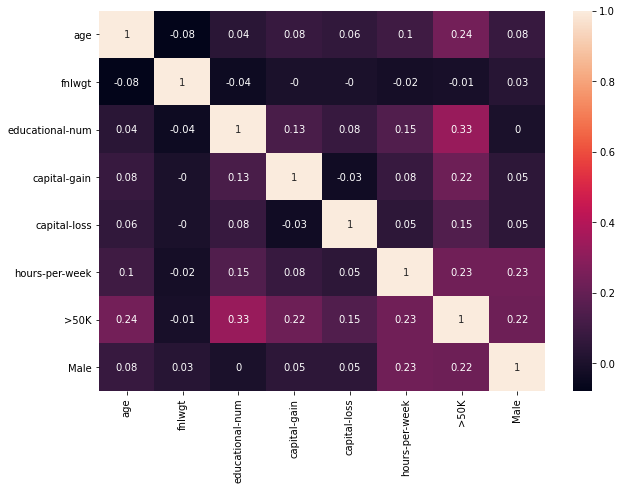

In [15]:
plt.figure(figsize=(10,7)) #Checking the correlations on heatmap between values
correlation_matrix=adults.corr().round(2) #Rounding the values to 2 decimal spaces
sns.heatmap(data=correlation_matrix, annot=True)

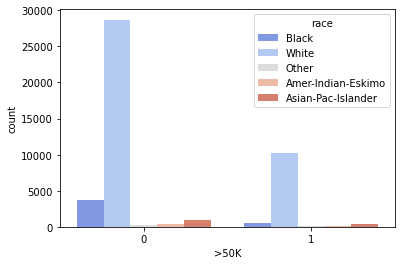

In [16]:
sns.countplot(adults['>50K'], palette = 'coolwarm', hue='race', data = adults) #Using sns providing a histogram between 2 columns

## DATASET DUPLICATION AND LABELLING TO AVOID CHANGES IN THE ORIGINAL DATASET

In [17]:
adults1 = adults.copy() #Making a copy of adult dataset called adults1
adults1 = adults1.apply(LabelEncoder().fit_transform) #Using LabelEncoder, autoamtically fitting the model and applying automatic
                                                      #label encoding to the dataset (changing from categorical to numerical)
adults1.head() #Representing how labelled data looks like

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,>50K,Male
0,8,2,18119,5,6,2,6,3,2,0,0,39,38,0,1
1,21,2,3913,3,8,1,4,0,4,0,0,49,38,0,1
2,11,1,23770,4,11,1,10,0,4,0,0,39,38,1,1
3,27,2,10474,4,9,1,6,0,2,96,0,39,38,1,1
5,17,2,15397,5,5,2,7,1,4,0,0,29,38,0,1


In [18]:
#Removing the unnecessary columns from the dataset which should not be included in the prediction due to their value/meaning
#adults1.drop(['fnlwgt','educational-num','race','capital-gain','capital-loss'], axis = 1, inplace= True)

In [19]:
#adults1.head(10)

## MODEL BUILDING USING LOGISTIC REGRESSION (NO SCALER)

In [20]:
x = adults1.drop(['>50K'], axis = 1) #Defining the x value, which is all of the data except target value
y = adults1['>50K'] #Defining the y value, which is the data target value (the one to be predicted)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0) #Splitting the dataset into train
                                                                                             #and test datasets

In [22]:
modelLogisticRegression = LogisticRegression(max_iter = 870) #Defining logistic regression model with the maximum iterations of 870
modelLogisticRegression.fit(x_train,y_train) #Fitting the model (logistic regression) with the training data

prediction = modelLogisticRegression.predict(x_test) #Defining the predictions of the model and storing them into prediction variable

#Getting results from the model (the model accuracy)
print("Model train score = {:.3f}\nModel test score = {:.3f}".format(modelLogisticRegression.score(x_train,y_train),
                                                                     modelLogisticRegression.score(x_test,y_test)))

Model train score = 0.831
Model test score = 0.822


## MODEL BUILDING USING LOGISTIC REGRESSION WITH STANDARD SCALER APPLIED

In [23]:
sc = StandardScaler() #Defining standard scaler

In [24]:
sc.fit(x_train) #Fitting data into standard scaler
x_train_scaled = sc.transform(x_train) #Transforming/Scaling original data to be scaled
x_test_scaled = sc.transform(x_test) #Transforming/Scaling original data to be scaled

In [25]:
model_scaled = LogisticRegression() #Defining logistic regression model
model_scaled.fit(x_train_scaled,y_train) #Fitting the model (logistic regression) with the scaled training data

prediction_scaled = model_scaled.predict(x_test_scaled) #Defining the predictions of the model and, storing them into 
                                                        #prediction variable, using scaled data

#Getting results from the model (the model accuracy) using scaled data
print("Model train score = {:.3f}\nModel test score = {:.3f}".format(model_scaled.score(x_train_scaled,y_train),
                                                                     model_scaled.score(x_test_scaled,y_test)))

Model train score = 0.837
Model test score = 0.825


## MODEL BUILDING USING SVC

In [26]:
modelSVC = SVC() #Defining the SVC model (Support vector classifier)
modelSVC.fit(x_train,y_train) #Fitting the model with the training data

predictionSVC = modelSVC.predict(x_test) #Defining the predictions of the model and, storing them into predictionSVC variable

#Getting results from the model (the model accuracy)
print("Model train score = {:.3f}\nModel test score = {:.3f}".format(modelSVC.score(x_train,y_train),modelSVC.score(x_test,y_test)))

Model train score = 0.753
Model test score = 0.749


## MODEL BUILDING USING KNN

In [39]:
modelKNeighbors = KNeighborsClassifier(n_neighbors=6) #Defining KNN (K nearest neighbors) model with neighbors to be taken 6
modelKNeighbors.fit(x_train, y_train) #Fitting the model with the training data

predictionKNN = modelKNeighbors.predict(x_test) #Defining the predictions of the model and, storing them into predictionKNN variable

#Getting results from the model (the model accuracy)
print("Model train score = {:.3f}\nModel test score = {:.3f}".format(modelKNeighbors.score(x_train,y_train),
                                                                     modelKNeighbors.score(x_test,y_test)))

Model train score = 0.827
Model test score = 0.778


## CONFUSION MATRIX OF THE MODEL 

In [59]:
print(confusion_matrix(y_test,predictionKNN)) #Getting the confusion mattrix where, the first column represents True Positive, 
                                              #True Negative and second column represents False Positive, False Negative 
# [TP FP]
# [TN FN]

[[8028  439]
 [2074  765]]


In [60]:
print(confusion_matrix(y_test,predictionKNN)) #Getting the confusion mattrix where, the first column represents True Positive, 
                                              #True Negative and second column represents False Positive, False Negative 

[[8028  439]
 [2074  765]]


In [61]:
print(classification_report(y_test,predictionKNN)) #Calssification report of the confusion matrix 

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      8467
           1       0.64      0.27      0.38      2839

    accuracy                           0.78     11306
   macro avg       0.72      0.61      0.62     11306
weighted avg       0.75      0.78      0.74     11306



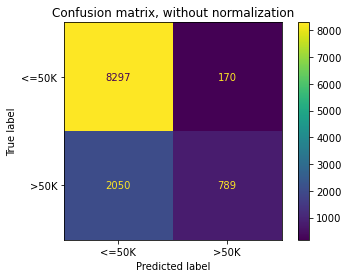

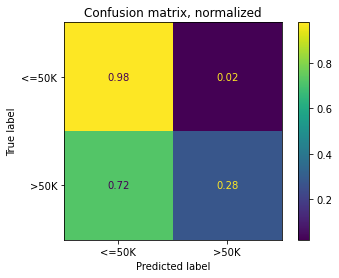

In [63]:
modelKNeighbors.fit(x_test,y_test) #Fitting the model to take the testing data

#Identifying the descriptions of the confusion matrixes, with and without normalization
titles = [('Confusion matrix, without normalization', None), ('Confusion matrix, normalized', 'true')]

#Using a for loop plotting both confusion matrixes
for title, normalization in titles:
    PCM = plot_confusion_matrix(modelKNeighbors, x_test, y_test, display_labels = ['<=50K','>50K'], normalize = normalization)
    PCM.ax_.set_title(title)

plt.show()

## MODEL BUILDING USING CROSS VALIDATION WITH KNN MODEL 

In [31]:
#Defining and building the cross validation model with x and y data, where the number of repeats are 5 and target to get is
#accuracy

scores = cross_val_score(modelKNeighbors, x, y, cv=5, scoring = 'accuracy')

#Printing the gotten results
print(scores)

[0.78197899 0.78684356 0.78449801 0.78637771 0.79068996]


In [32]:
print("The average accuracy score for Cross Validation KNN is: {:.3f}".format(scores.mean()))

The average accuracy score for Cross Validation KNN is: 0.786


In [33]:
n_scores = [] #List to record average model accuracy for each iteration
for i in range(1,31): #Iterating trough numbers from 1 to 31
    modelKNeighbors = KNeighborsClassifier(n_neighbors=i) #Defining KNN with the neighbor number being i (1-31)
    scores = cross_val_score(modelKNeighbors, x, y, cv=5, scoring = 'accuracy') #Building CV model with the model being KNN
    n_scores.append(scores.mean()) #Storing the mean scores of the model into n_scores

print("The average accuracy scores for Cross Validation KNN are: \n", n_scores)

The average accuracy scores for Cross Validation KNN are: 
 [0.734797245772709, 0.7809473175671595, 0.7619963551450082, 0.7858564590189745, 0.774910434803231, 0.7860776465600642, 0.7797090594988105, 0.7881119783166823, 0.7830038905673119, 0.7888859281165551, 0.7865862001604342, 0.7885542776070016, 0.7868294357980602, 0.7888196395779224, 0.7884216002888893, 0.7893724507346798, 0.788487937725496, 0.7886426729197396, 0.7884658187268972, 0.7882225366361959, 0.7882446605245922, 0.787050571996277, 0.7872274848666881, 0.7857679903592754, 0.78636505907242, 0.783777796359008, 0.7848171154644977, 0.7823625691875772, 0.7830480870012314, 0.7806819702656309]


In [34]:
n_scores2 = [] #Defining a new list to store the float numbers and not the numpy float64 numbers from n_scores
for i in n_scores: #Iterating through every n_score value
    n_scores2.append(round(float(i),4)) #Changing and storing the numpy float64 values to be float values with 4 decimal spaces
print(sorted(n_scores2, key= float)) #Sorting the list from lowest to highest accuracy

[0.7348, 0.762, 0.7749, 0.7797, 0.7807, 0.7809, 0.7824, 0.783, 0.783, 0.7838, 0.7848, 0.7858, 0.7859, 0.7861, 0.7864, 0.7866, 0.7868, 0.7871, 0.7872, 0.7881, 0.7882, 0.7882, 0.7884, 0.7885, 0.7885, 0.7886, 0.7886, 0.7888, 0.7889, 0.7894]


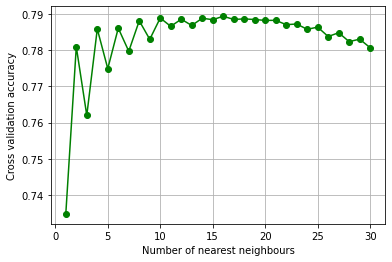

In [35]:
#Plotting the n_scores values into a 2D map, where x axis is the K nearest neighbors number
#and y axis is the accuracy at that point

x=range(1,31) 
y_plt=n_scores

plt.plot(x, y_plt, '-ok',color='green');
plt.xlabel('Number of nearest neighbours')
plt.ylabel('Cross validation accuracy')
plt.grid()